## Import and summarize data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset Link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
df = pd.read_csv('/content/drive/My Drive/cardio_dataset.csv', sep=";")
# df = pd.read_csv('./cardio_dataset.csv', sep=";")
df.drop("id",axis=1,inplace=True)
# df.head(5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


## Clean the data

Check if unique values of certain discreate variables tally correctly with the information given in the dataset site i.e. Kaggle

In [ ]:
df.nunique()

age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

Check if there are null values and remove them

In [ ]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [ ]:
# convert age into years (from days)
df['age'] = df.age.transform(lambda x: x/365)

# create new features
df["bmi"] = df["weight"] / (df["height"]/100)**2
df['MAP'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

Plot and visualize the outliers

age               AxesSubplot(0.125,0.536818;0.0945122x0.343182)
gender         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
height         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
weight         AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
ap_hi          AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
ap_lo          AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
cholesterol    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
gluc                 AxesSubplot(0.125,0.125;0.0945122x0.343182)
smoke             AxesSubplot(0.238415,0.125;0.0945122x0.343182)
alco              AxesSubplot(0.351829,0.125;0.0945122x0.343182)
active            AxesSubplot(0.465244,0.125;0.0945122x0.343182)
cardio            AxesSubplot(0.578659,0.125;0.0945122x0.343182)
bmi               AxesSubplot(0.692073,0.125;0.0945122x0.343182)
MAP               AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

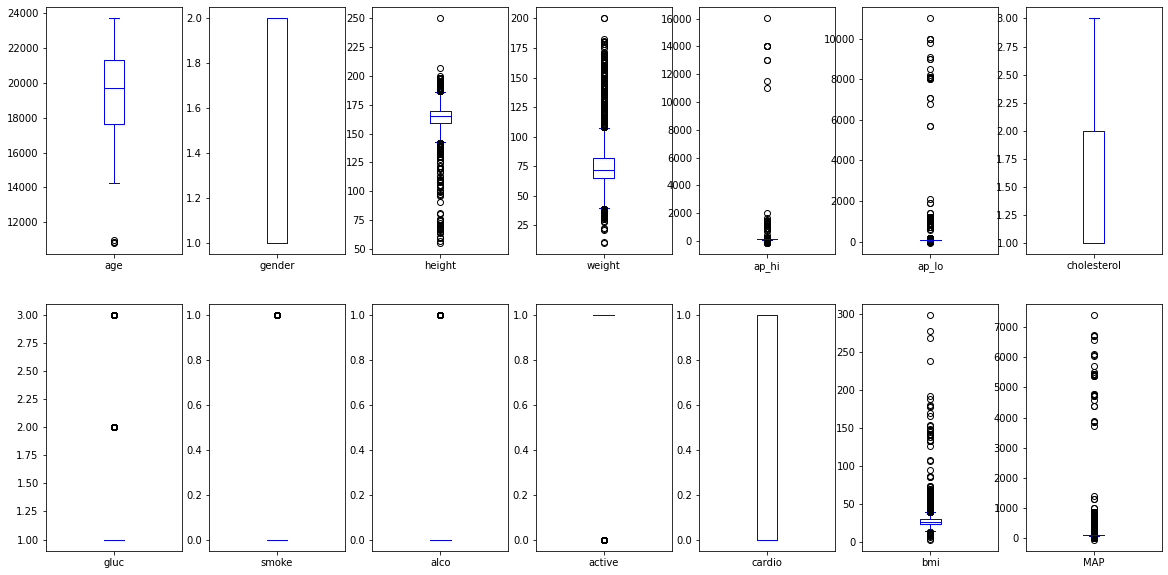

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,7), sharex=False,sharey=False, figsize=(20, 10), color='blue')

Count the number of outliers i.e. data points below 25 %ile and those above 75%ile

In [4]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

In [5]:
continous_features = ['age','height','weight','ap_hi','ap_lo']  
outliers(df[continous_features])

For the feature age, No of Outliers is 4
For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819
For the feature ap_hi, No of Outliers is 1435
For the feature ap_lo, No of Outliers is 4632


Drop the outliers

In [6]:
outliers(df[continous_features], drop=True)

Outliers from age feature removed
Outliers from height feature removed
Outliers from weight feature removed
Outliers from ap_hi feature removed
Outliers from ap_lo feature removed


Also drop those outliers where diastolic bp is greater than systolic bp

In [7]:
df.drop(df[df['ap_lo']>df['ap_hi']].index, inplace=True)
df.drop_duplicates(inplace=True)

## Visulalize data

### Manual plots

0    50.601831
1    49.398169
Name: cardio, dtype: float64


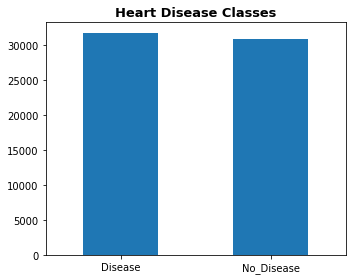

In [ ]:
print(df['cardio'].value_counts(normalize=True) * 100)

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = df.cardio.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
    
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


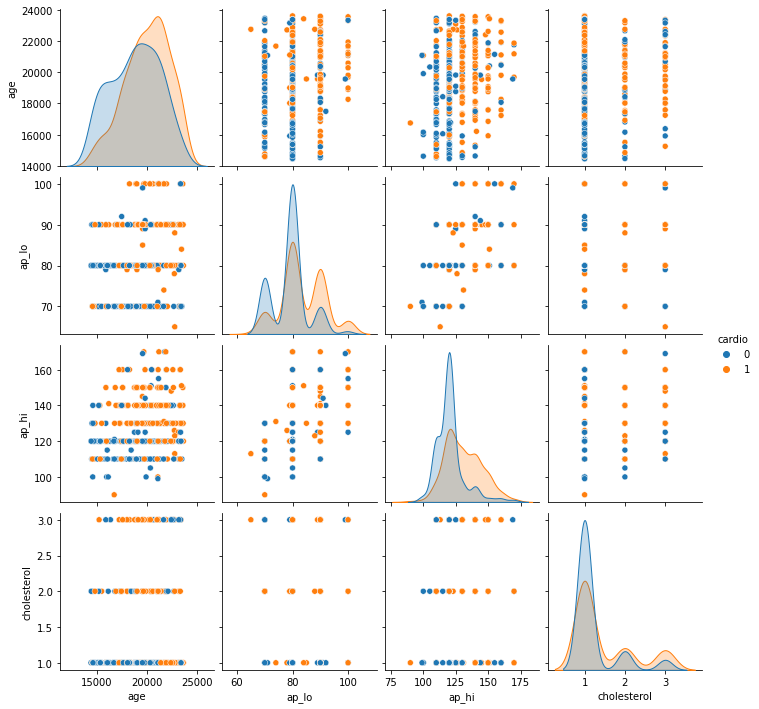

In [ ]:
sns.pairplot(df.sample(n=500)[['age','ap_lo','ap_hi','cholesterol','cardio']], 'cardio')

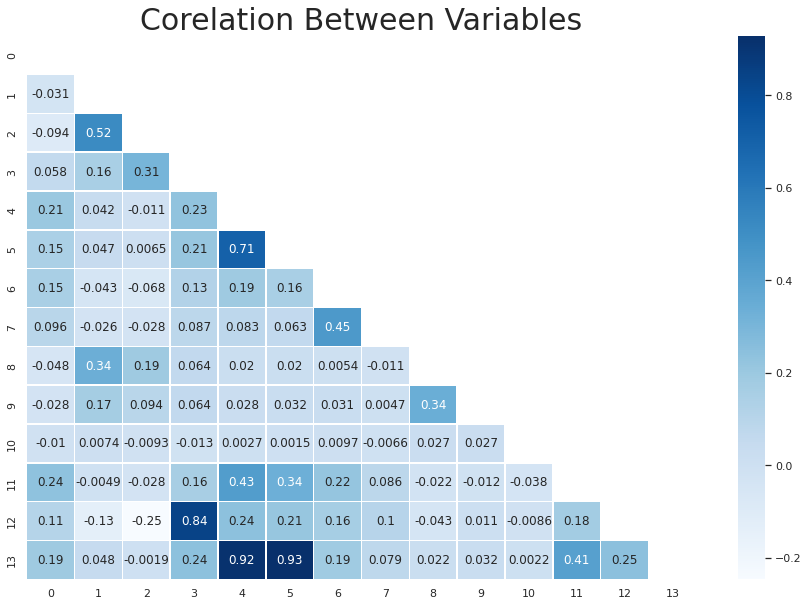

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(np.tril(corr), mask=mask, annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

###Univariate Analysis

Text(0.5, 1.0, 'Age Distribution (Days)')

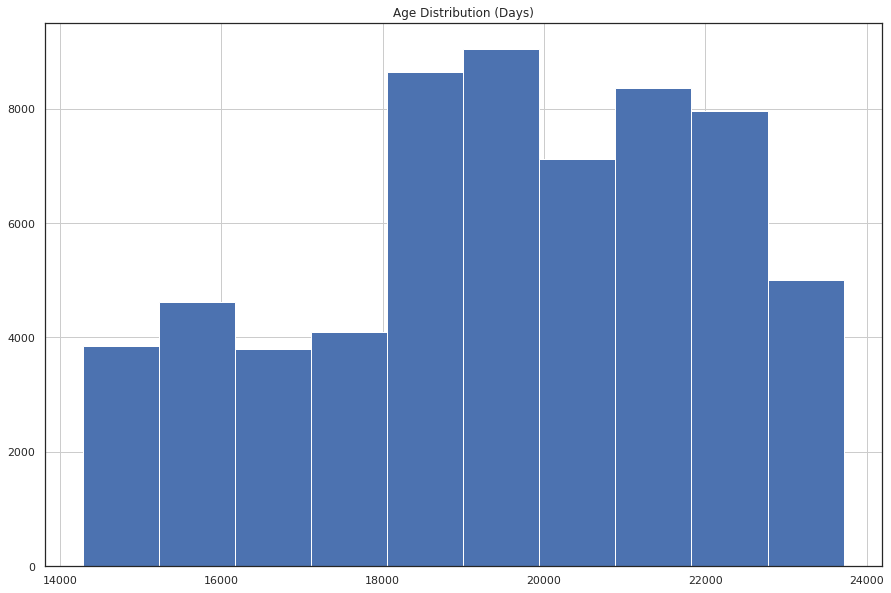

In [ ]:
df['age'].hist().plot(kind='bar')
plt.title('Age Distribution (Days)')

Text(0.5, 1.0, 'Height Distribution (cm)')

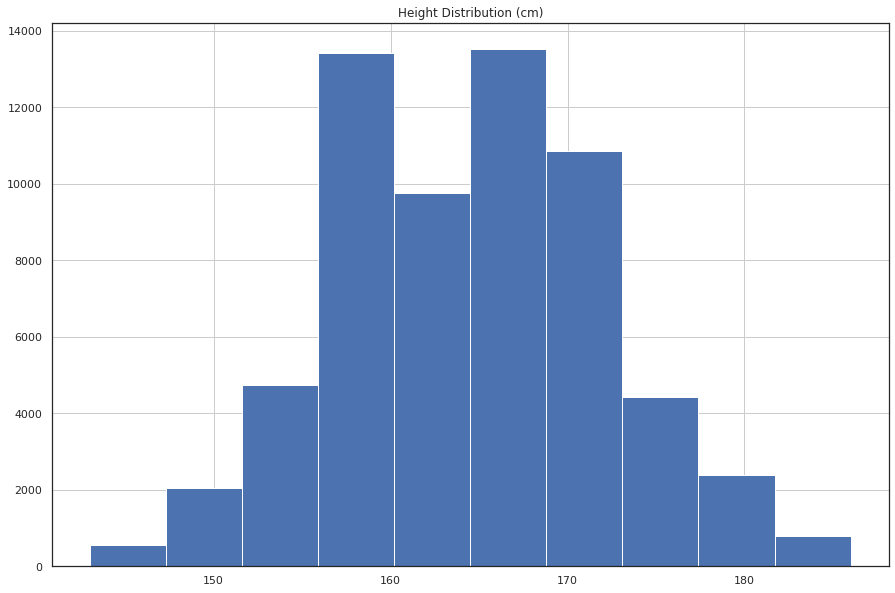

In [ ]:
df['height'].hist().plot(kind='bar')
plt.title('Height Distribution (cm)')

Text(0.5, 1.0, 'Weight Distribution (kg)')

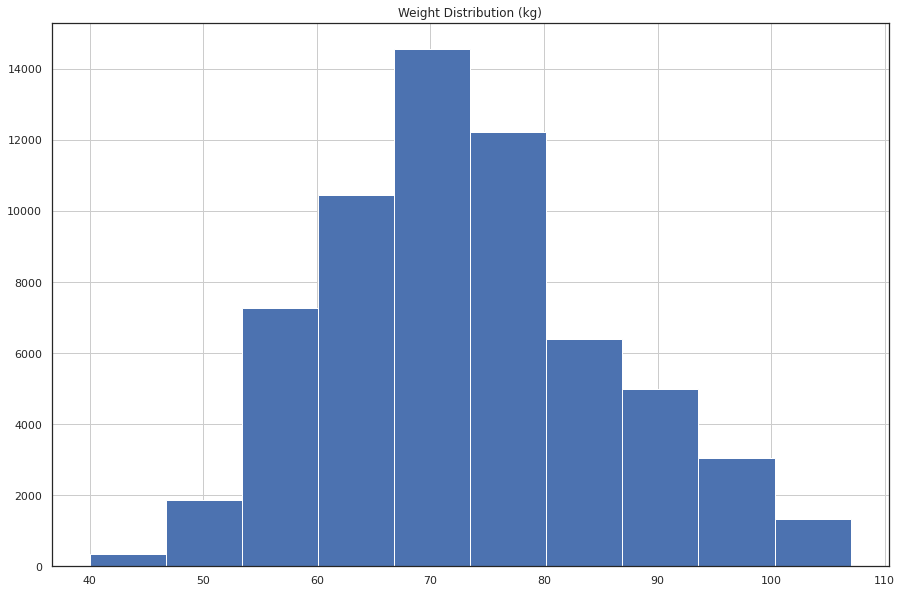

In [ ]:
df['weight'].hist().plot(kind='bar')
plt.title('Weight Distribution (kg)')

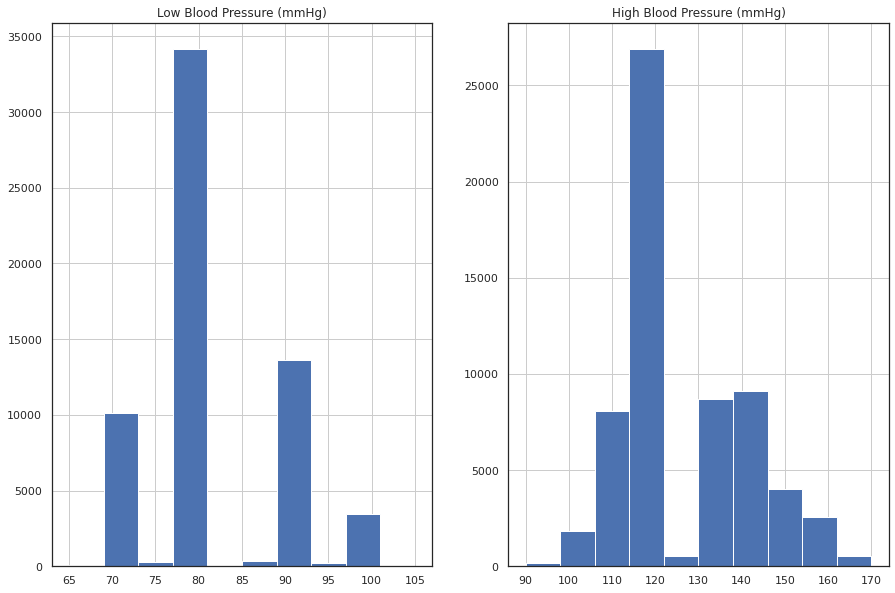

In [ ]:
plt.subplot(1, 2, 1)
plt.title('Low Blood Pressure (mmHg)')
df['ap_lo'].hist()
plt.subplot(1, 2, 2)
plt.title('High Blood Pressure (mmHg)')
df['ap_hi'].hist()

Multivariate Analysis

1    65.135412
2    34.864588
Name: gender, dtype: float64


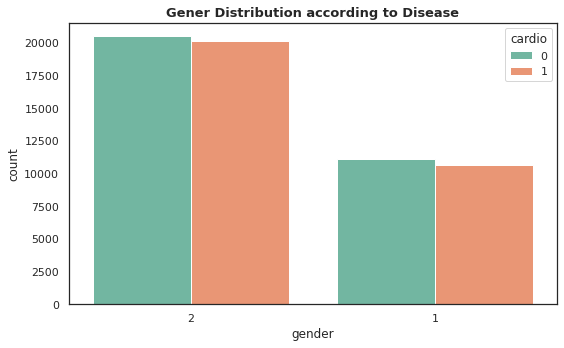

In [ ]:
print(df['gender'].value_counts(normalize=True) * 100)

fig, ax = plt.subplots(figsize=(8,5))
name = df['gender']
ax = sns.countplot(x='gender', hue='cardio', data=df, palette='Set2')
ax.set_title("Gener Distribution according to Disease", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0) 
plt.tight_layout()

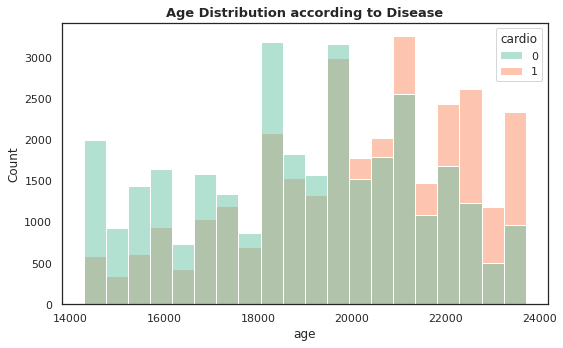

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['age']
ax = sns.histplot(x='age', hue='cardio', data=df, palette='Set2', bins=20)
ax.set_title("Age Distribution according to Disease", fontsize = 13, weight = 'bold')
# ax.set_xticklabels (name, rotation = 0) 
plt.tight_layout()

1    75.525002
2    13.163455
3    11.311544
Name: cholesterol, dtype: float64


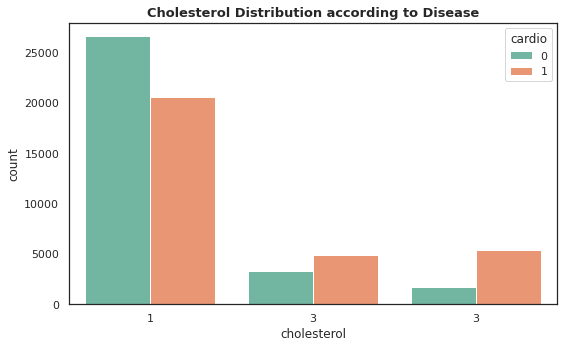

In [ ]:
  print(df['cholesterol'].value_counts(normalize=True) * 100)

fig, ax = plt.subplots(figsize=(8,5))
name = df['cholesterol']
ax = sns.countplot(x='cholesterol', hue='cardio', data=df, palette='Set2')
ax.set_title("Cholesterol Distribution according to Disease", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0) 
plt.tight_layout()

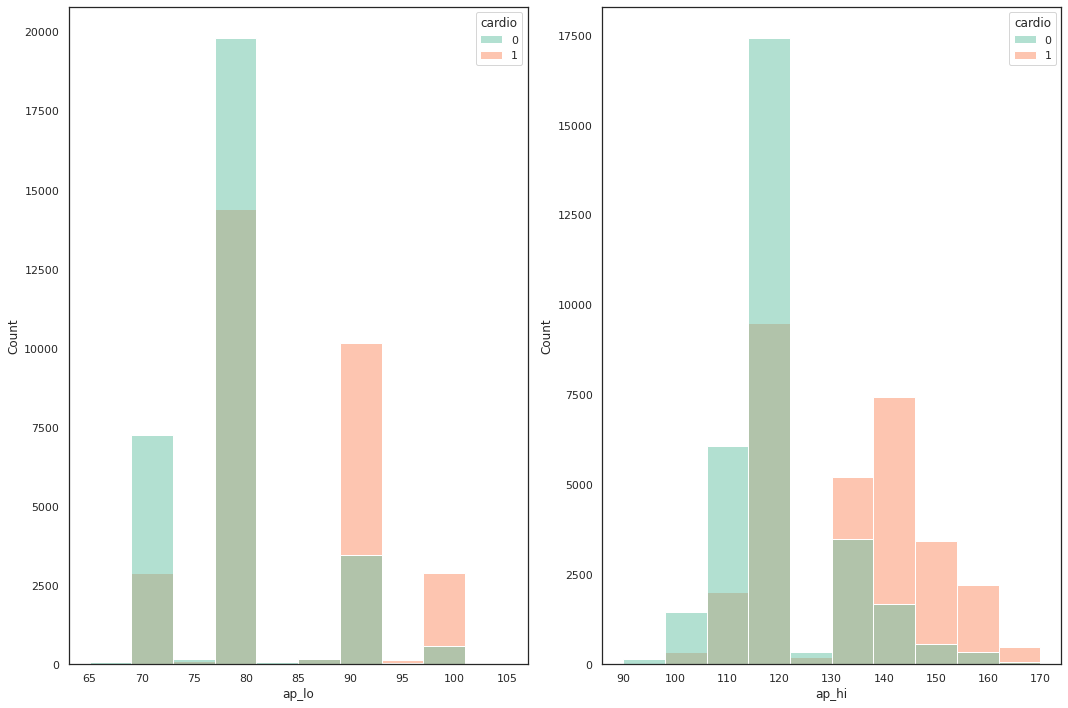

In [ ]:
plt.subplot(1,2,1)
sns.histplot(x='ap_lo', hue='cardio', data=df, palette='Set2', bins=10)

plt.subplot(1,2,2)
sns.histplot(x='ap_hi', hue='cardio', data=df, palette='Set2', bins=10)

plt.tight_layout()

### Automatic Plots using **External Library**

In [32]:
%pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="EDA of Heart Disease", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

     | 25.9 MB 59.0 MB/s
     |████████████████████████████████| 10.9 MB 15.0 MB/s 
     |████████████████████████████████| 596 kB 50.5 MB/s 
     |████████████████████████████████| 102 kB 13.4 MB/s 
     |████████████████████████████████| 690 kB 53.1 MB/s 
     |████████████████████████████████| 4.7 MB 59.4 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 812 kB 55.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=83792b28933a9a975feaec21e3612bf52168ff8dda263afbc4d63d74be470f92
  Stored in directory: /tmp/pip-ephem-wheel-cache-vfcia8nv/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=393e5163832ccb071d79e587f03fdb8cdf9f6530d9fe5005511f799643b53a61
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Normalize(min/max) and split into train and test sets

In [8]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.head()

age  gender    height    weight  ap_hi  ap_lo  cholesterol  gluc  \
0  0.435903     1.0  0.581395  0.328358  0.250  0.375          0.0   0.0   
1  0.630474     0.0  0.302326  0.671642  0.625  0.625          1.0   0.0   
2  0.485102     0.0  0.511628  0.358209  0.500  0.125          1.0   0.0   
3  0.354257     1.0  0.604651  0.626866  0.750  0.875          0.0   0.0   
5  0.809246     0.0  0.186047  0.402985  0.375  0.375          0.5   0.5   

   smoke  alco  active  cardio  
0    0.0   0.0     1.0     0.0  
1    0.0   0.0     1.0     1.0  
2    0.0   0.0     0.0     1.0  
3    0.0   0.0     1.0     1.0  
5    0.0   0.0     0.0     0.0

In [9]:
_df = normalized_df.copy()
_output = _df.pop('cardio')
x_train, x_test, y_train, y_test = train_test_split(_df, _output, test_size=0.2)
print(x_train.shape , x_test.shape, y_train.shape, y_test.shape)

(49980, 11) (12496, 11) (49980,) (12496,)


## Utility Functions

In [10]:
def model_metrics(y_pred, y_test):
    print('Accuracy of the model is = {accuracy:.3f}% \n'.format(accuracy=accuracy_score(y_test, y_pred)*100))

    print('The details for confusion matrix is =')
    print (classification_report(y_test, y_pred))

    fig, ax = plt.subplots(1, 2, figsize=(20,7))
    # consusion matrix - subplot 1
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax[0], cmap='Blues')
    ax[0].set_title('Confusion Matrix')

    # ROC Curve - subplot 2
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    ax[1].plot(fpr,tpr)
    ax[1].set_title('ROC curve for Heart disease classifier')
    ax[1].set_xlabel('False positive rate (1-Specificity)')
    ax[1].set_ylabel('True positive rate (Sensitivity)')
    ax[1].grid(True)

## 1. KNN

In [ ]:
ks = [1, 51, 101, 201, 501, 1001, 5001, 10001]
train_errs = []
test_errs = []
gen_gap = []
for k in ks:
    knn = KNN(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_errs.append(1 - knn.score(x_train, y_train))
    test_errs.append(1 - knn.score(x_test, y_test))
    gen_gap.append(train_errs[-1]-test_errs[-1])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))

ax[0].plot(ks, train_errs, 'bs:', label='train')
ax[0].plot(ks, test_errs, 'rx-', label='test')
ax[0].legend()
ax[0].set_xlabel('k')
ax[0].set_ylabel('misclassification rate')

ax[1].plot(ks, gen_gap, 'c^-', label='gen-gap')
ax[1].legend(loc=4)
ax[1].set_xlabel('k')
ax[1].set_ylabel('Train Error - Test Error')
for x, y in zip(ks, gen_gap):
    label = "{:.3f}".format(y)
    ax[1].annotate(label, (x, y), textcoords="offset points", xytext=(
        0, 10), ha='center', arrowprops=dict(arrowstyle="->", color='green'))

plt.show()

In [ ]:
# ideal value of K=100
knn = KNN(n_neighbors=100)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

0.7270908363345339
Accuracy of the model is = 72.439% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74      6217
         1.0       0.76      0.66      0.71      6279

    accuracy                           0.72     12496
   macro avg       0.73      0.72      0.72     12496
weighted avg       0.73      0.72      0.72     12496



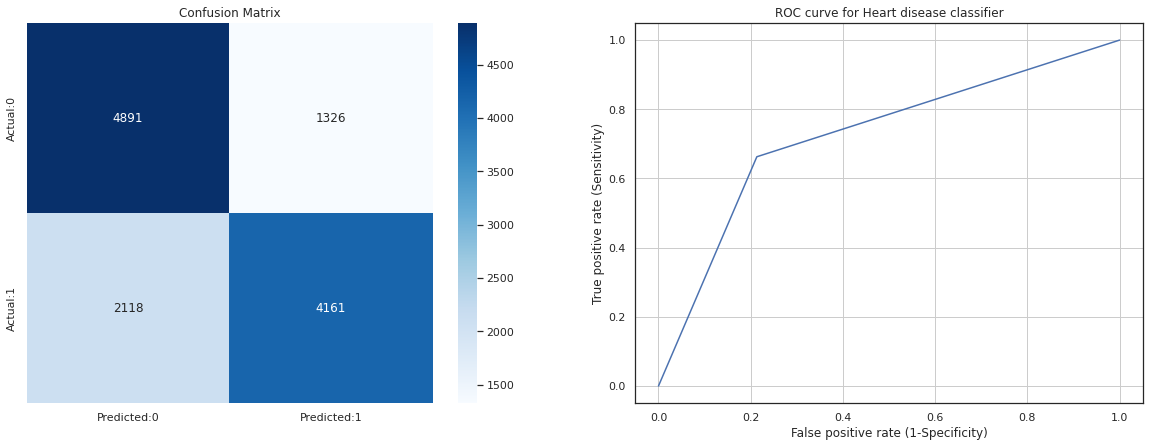

In [ ]:
print(knn.score(x_train, y_train))
model_metrics(y_pred_knn, y_test)

## 2. Logistic Regression

Accuracy of the model is = 72.319% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74      6243
         1.0       0.76      0.65      0.70      6253

    accuracy                           0.72     12496
   macro avg       0.73      0.72      0.72     12496
weighted avg       0.73      0.72      0.72     12496



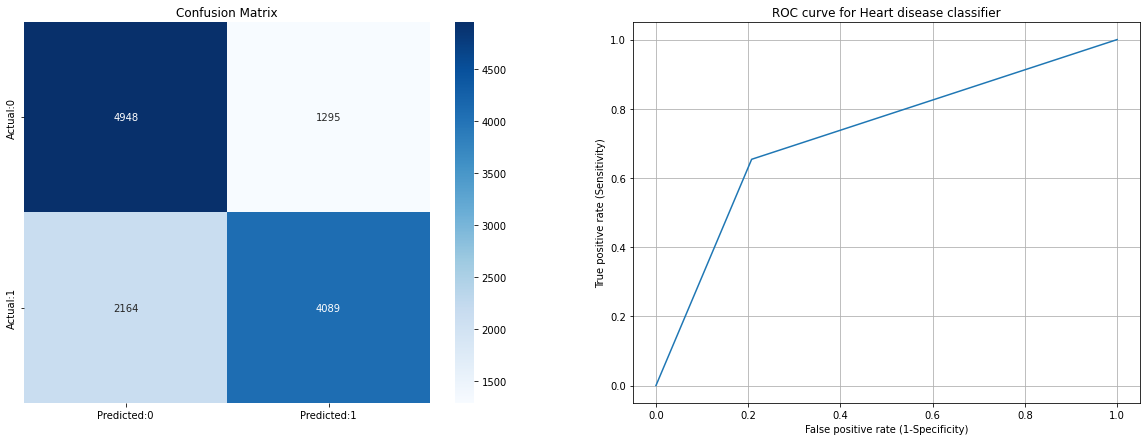

In [27]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_lr = logreg.predict(x_test)
model_metrics(y_pred_lr, y_test)

### Feature Selection

In [ ]:
column_names = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active','age', 'bmi','MAP','cardio']
normalized_df = normalized_df.reindex(columns=column_names)

In [ ]:
from statsmodels.tools import add_constant
df_constant = add_constant(normalized_df)
df_constant.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const  gender    height    weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0    1.0     1.0  0.581395  0.328358  0.250  0.375          0.0   0.0    0.0   
1    1.0     0.0  0.302326  0.671642  0.625  0.625          1.0   0.0    0.0   
2    1.0     0.0  0.511628  0.358209  0.500  0.125          1.0   0.0    0.0   
3    1.0     1.0  0.604651  0.626866  0.750  0.875          0.0   0.0    0.0   
5    1.0     0.0  0.186047  0.402985  0.375  0.375          0.5   0.5    0.0   

   alco  active       age       bmi       MAP  cardio  
0   0.0     1.0  0.435903  0.226012  0.316456     0.0  
1   0.0     1.0  0.630474  0.572820  0.632911     1.0  
2   0.0     0.0  0.485102  0.267239  0.316456     1.0  
3   0.0     1.0  0.354257  0.406456  0.822785     1.0  
5   0.0     0.0  0.809246  0.424497  0.379747     0.0

In [ ]:
import scipy.stats as st
import statsmodels.api as sm

st.chisqprob = lambda chisq, normalized_df: st.chi2.sf(chisq, normalized_df)
cols = df_constant.columns[:-1]
model = sm.Logit(normalized_df.cardio, df_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.562058
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                62476
Model:                          Logit   Df Residuals:                    62463
Method:                           MLE   Df Model:                           12
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.1890
Time:                        08:27:48   Log-Likelihood:                -35115.
converged:                       True   LL-Null:                       -43301.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.3202      0.198    -16.739      0.000      -3.709      -2.931
gender         -0.0278      0.023     -1.192      0.233      -0.073       0.018
height         -0.4256      0.339     -1.255      0.209      -1.090       0.239
weight          1.2246      0.587      2.085      0.037       0.074       2.376
ap_hi           4.0200   4.44e+05   9.05e-06      1.000    -8.7e+05     8.7e+05
ap_lo          -0.3354   4.44e+05  -7.55e-07      1.000    -8.7e+05     8.7e+05
cholesterol     0.9893      0.033     30.099      0.000       0.925       1.054
gluc           -0.2304      0.037     -6.186      0.000      -0.303      -0.157
smoke          -0.1628      0.037     -4.429      0.000      -0.235      -0.091
alco           -0.2225      0.045     -4.966      0.000      -0.310      -0.135
active         -0.2361      0.023    -10.286      0.000      -0.281      -0.191
age             1.3287      0.037     36.135      0.000       1.257       1.401
bmi            -0.6309      0.866     -0.729      0.466      -2.328       1.066
MAP             1.8656   8.77e+05   2.13e-06      1.000   -1.72e+06    1.72e+06
===============================================================================
"""

In [ ]:
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
            print("Column",largest_pvalue.index,'dropped')
result = back_feature_elem(df_constant, df.cardio, cols)
result.summary()

Column Index(['ap_hi'], dtype='object') dropped
Column Index(['bmi'], dtype='object') dropped
Column Index(['gender'], dtype='object') dropped


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                62476
Model:                          Logit   Df Residuals:                    62465
Method:                           MLE   Df Model:                           10
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.1890
Time:                        08:27:49   Log-Likelihood:                -35116.
converged:                       True   LL-Null:                       -43301.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.4495      0.050    -68.687      0.000      -3.548      -3.351
height         -0.2173      0.057     -3.818      0.000      -0.329      -0.106
weight          0.7994      0.055     14.491      0.000       0.691       0.908
ap_lo          -4.3542      0.140    -31.189      0.000      -4.628      -4.081
cholesterol     0.9901      0.033     30.132      0.000       0.926       1.055
gluc           -0.2300      0.037     -6.178      0.000      -0.303      -0.157
smoke          -0.1734      0.036     -4.876      0.000      -0.243      -0.104
alco           -0.2249      0.045     -5.027      0.000      -0.313      -0.137
active         -0.2362      0.023    -10.288      0.000      -0.281      -0.191
age             1.3274      0.037     36.115      0.000       1.255       1.399
MAP             9.8007      0.165     59.323      0.000       9.477      10.124
===============================================================================
"""

In [ ]:
xt = x_train.drop(columns=['gender'])
logreg = LogisticRegression()
logreg.fit(xt, y_train)
y_pred_lr = logreg.predict(x_test.drop(columns=['gender']))

0.7231292517006803
Accuracy of the model is = 72.151% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74      6217
         1.0       0.75      0.66      0.70      6279

    accuracy                           0.72     12496
   macro avg       0.72      0.72      0.72     12496
weighted avg       0.73      0.72      0.72     12496



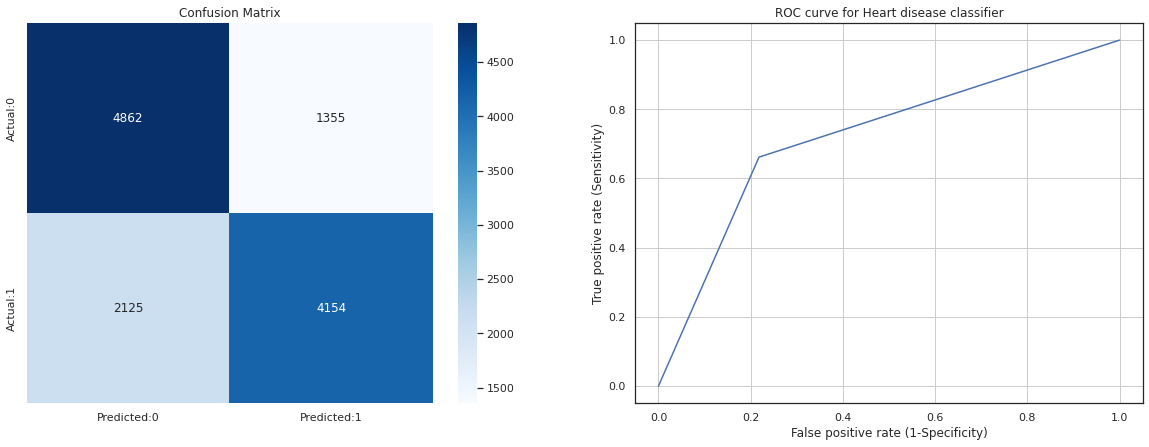

In [ ]:
print(logreg.score(xt, y_train))
model_metrics(y_pred_lr, y_test)

In [ ]:
xt = x_train.drop(columns=['gender'])
knn = KNN(n_neighbors=100)
knn.fit(xt, y_train)
y_pred_knn = knn.predict(x_test.drop(columns=['gender']))

0.7302521008403361
Accuracy of the model is = 72.343% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74      6217
         1.0       0.76      0.66      0.71      6279

    accuracy                           0.72     12496
   macro avg       0.73      0.72      0.72     12496
weighted avg       0.73      0.72      0.72     12496



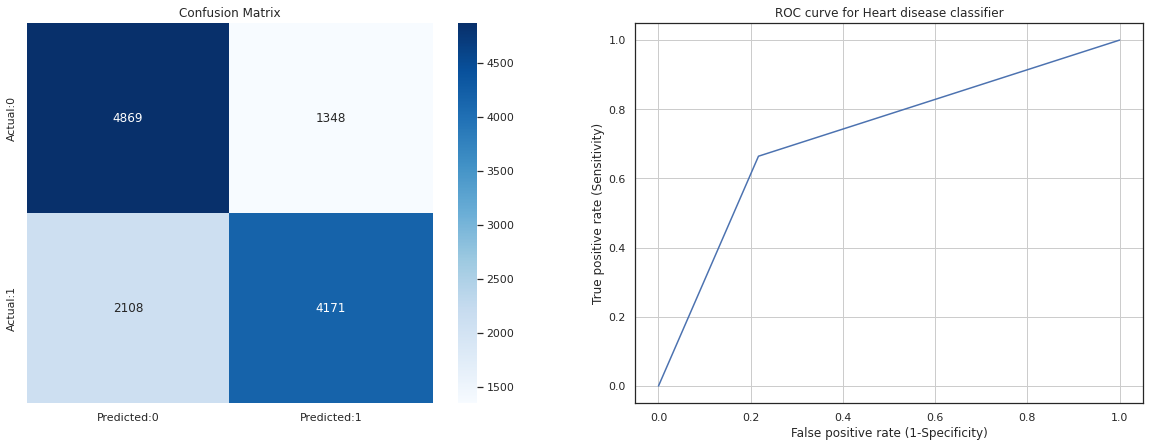

In [ ]:
print(knn.score(xt, y_train))
model_metrics(y_pred_knn, y_test)

## Objective Model

In [ ]:
df_objective = normalized_df.copy()
df_objective.drop(columns=['smoke','alco','active'], inplace=True)
_output = df_objective.pop('cardio')
x_train, x_test, y_train, y_test = train_test_split(df_objective, _output, test_size=0.2)
print(x_train.shape , x_test.shape, y_train.shape, y_test.shape)

(49980, 10) (12496, 10) (49980,) (12496,)


In [ ]:
# ideal value of K=100
knn = KNN(n_neighbors=100)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_lr = logreg.predict(x_test)

0.7300720288115247
Accuracy of the model is = 72.271% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74      6321
         1.0       0.75      0.66      0.70      6175

    accuracy                           0.72     12496
   macro avg       0.73      0.72      0.72     12496
weighted avg       0.73      0.72      0.72     12496



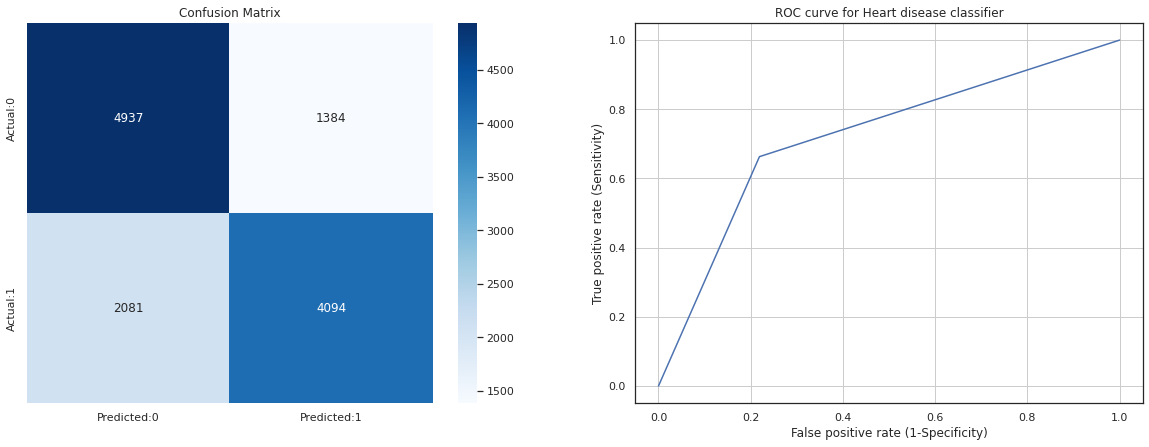

In [ ]:
print(knn.score(x_train, y_train))
model_metrics(y_pred_knn, y_test)

0.7233493397358943
Accuracy of the model is = 71.679% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.70      0.78      0.74      6321
         1.0       0.74      0.65      0.69      6175

    accuracy                           0.72     12496
   macro avg       0.72      0.72      0.72     12496
weighted avg       0.72      0.72      0.72     12496



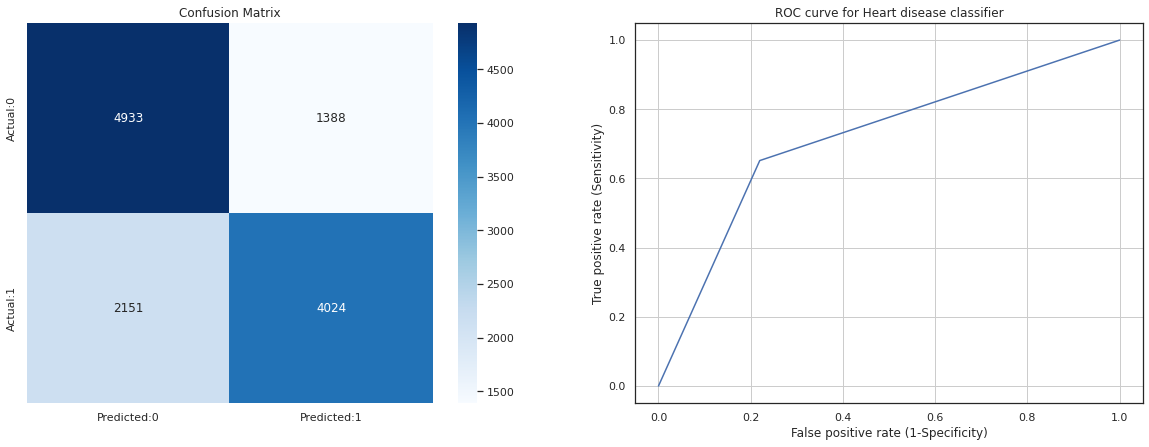

In [ ]:
print(logreg.score(x_train, y_train))
model_metrics(y_pred_lr, y_test)

## 3. Naive Bayes

Accuracy of the model is = 70.863% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.68      0.80      0.74      6371
         1.0       0.75      0.61      0.67      6125

    accuracy                           0.71     12496
   macro avg       0.72      0.71      0.71     12496
weighted avg       0.71      0.71      0.71     12496



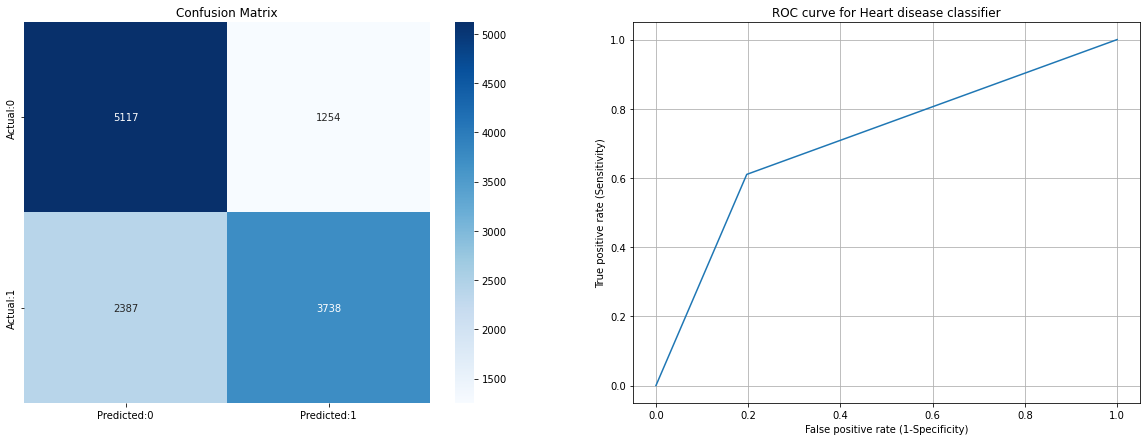

In [ ]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)
model_metrics(y_pred_gnb, y_test)

## 4. Decision Tree

Accuracy of the model is = 70.639% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73      6243
         1.0       0.76      0.61      0.67      6253

    accuracy                           0.71     12496
   macro avg       0.71      0.71      0.70     12496
weighted avg       0.71      0.71      0.70     12496



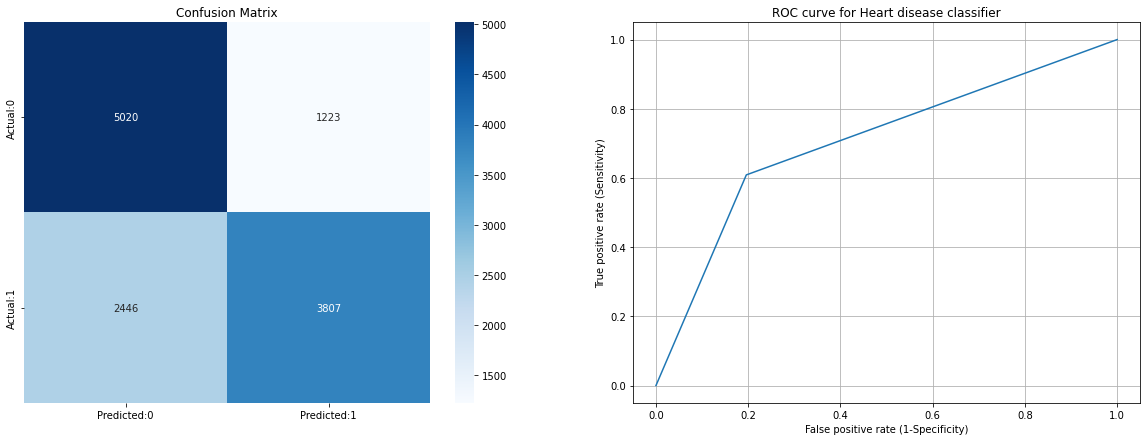

In [17]:
clf = DecisionTreeClassifier(max_leaf_nodes=2, random_state=0)
y_pred_dt = clf.fit(x_train, y_train).predict(x_test)
model_metrics(y_pred_dt, y_test)

## 5. SVM

Accuracy of the model is = 72.679% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75      6243
         1.0       0.77      0.65      0.70      6253

    accuracy                           0.73     12496
   macro avg       0.73      0.73      0.73     12496
weighted avg       0.73      0.73      0.73     12496



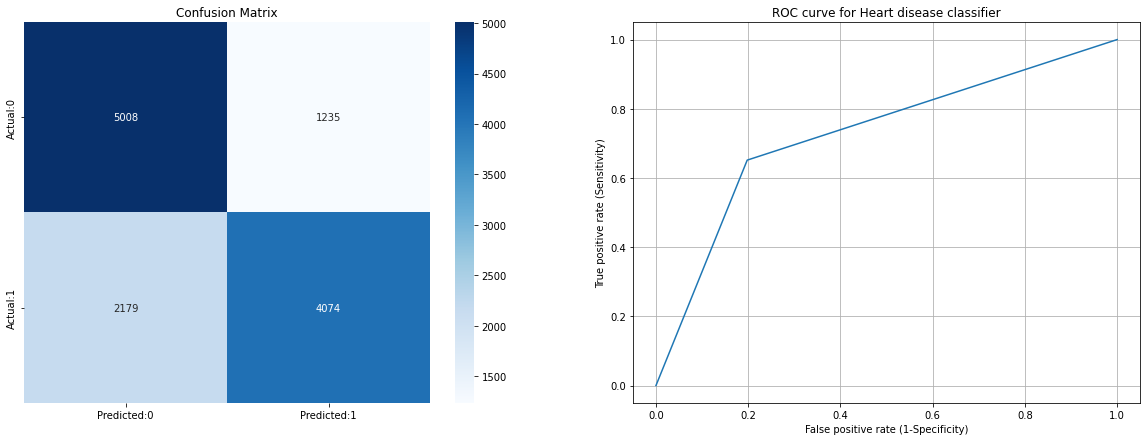

In [23]:
clf = SVC()
y_pred_svm = clf.fit(x_train, y_train).predict(x_test)
model_metrics(y_pred_svm, y_test)

## 6. LDA

Accuracy of the model is = 72.143% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74      6371
         1.0       0.75      0.65      0.70      6125

    accuracy                           0.72     12496
   macro avg       0.72      0.72      0.72     12496
weighted avg       0.72      0.72      0.72     12496



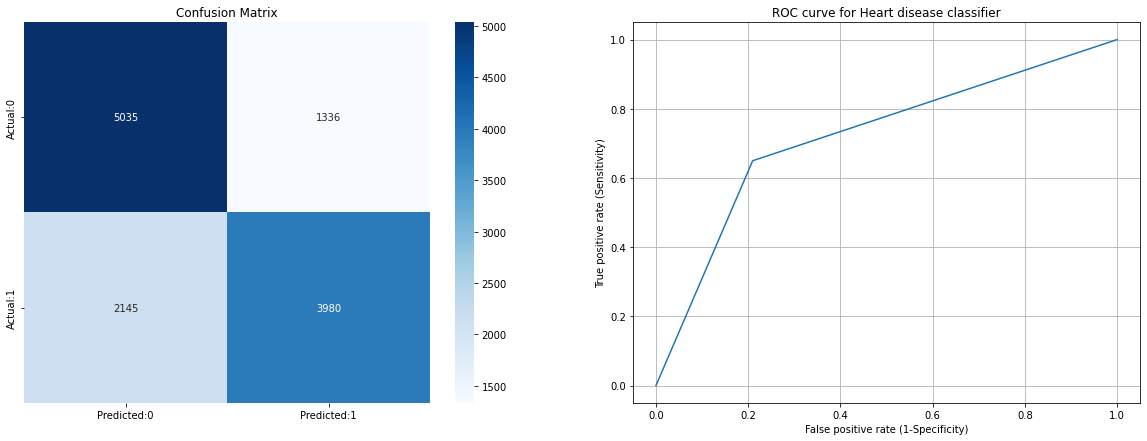

In [ ]:
clf = LinearDiscriminantAnalysis()
y_pred_svm = clf.fit(x_train, y_train).predict(x_test)
model_metrics(y_pred_svm, y_test)

## 7. Principal Component Analysis

In [12]:
pca = PCA(n_components=7)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

### Logistic Regression

Accuracy of the model is = 71.591% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.69      0.77      0.73      6243
         1.0       0.74      0.66      0.70      6253

    accuracy                           0.72     12496
   macro avg       0.72      0.72      0.71     12496
weighted avg       0.72      0.72      0.71     12496



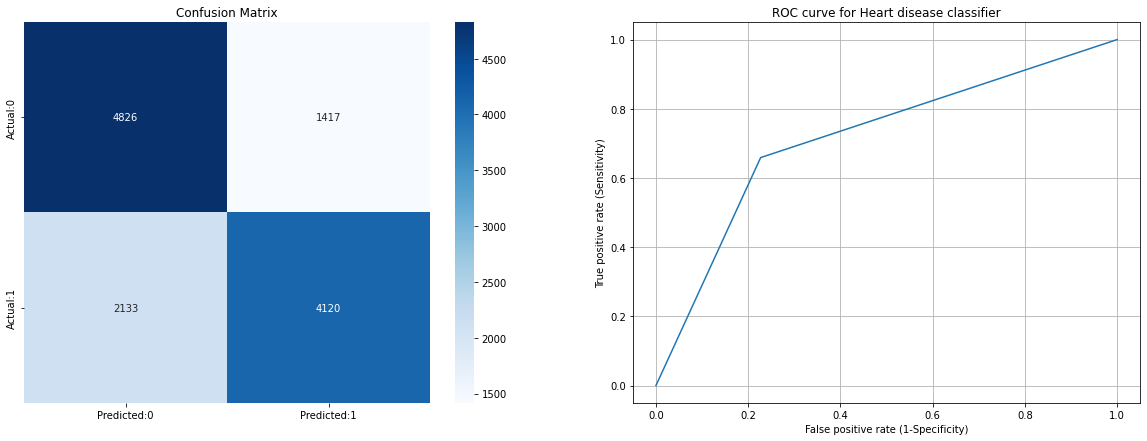

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
model_metrics(y_pred_lr, y_test)

### Naive Bayes

Accuracy of the model is = 68.838% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.65      0.81      0.72      6243
         1.0       0.75      0.57      0.65      6253

    accuracy                           0.69     12496
   macro avg       0.70      0.69      0.68     12496
weighted avg       0.70      0.69      0.68     12496



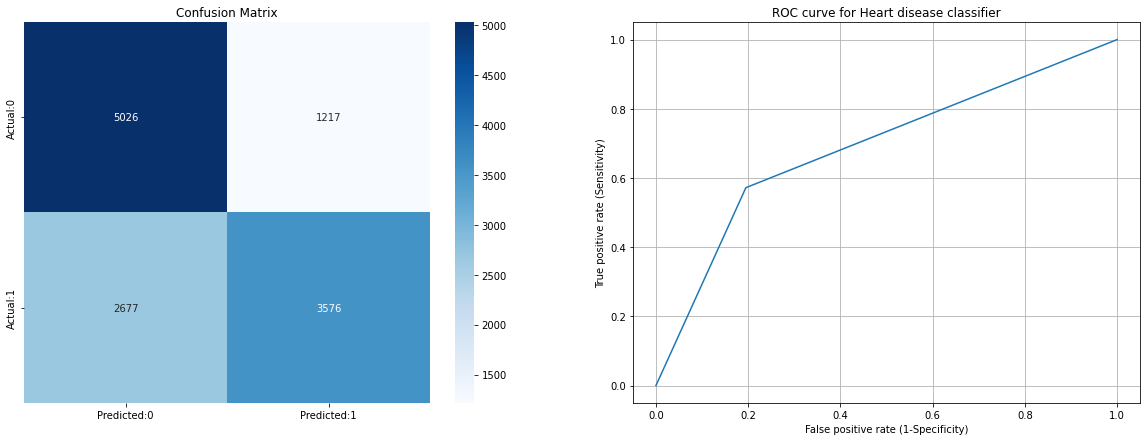

In [16]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
model_metrics(y_pred_gnb, y_test)

### Decision Tree

Accuracy of the model is = 64.309% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.71      0.49      0.58      6243
         1.0       0.61      0.80      0.69      6253

    accuracy                           0.64     12496
   macro avg       0.66      0.64      0.63     12496
weighted avg       0.66      0.64      0.63     12496



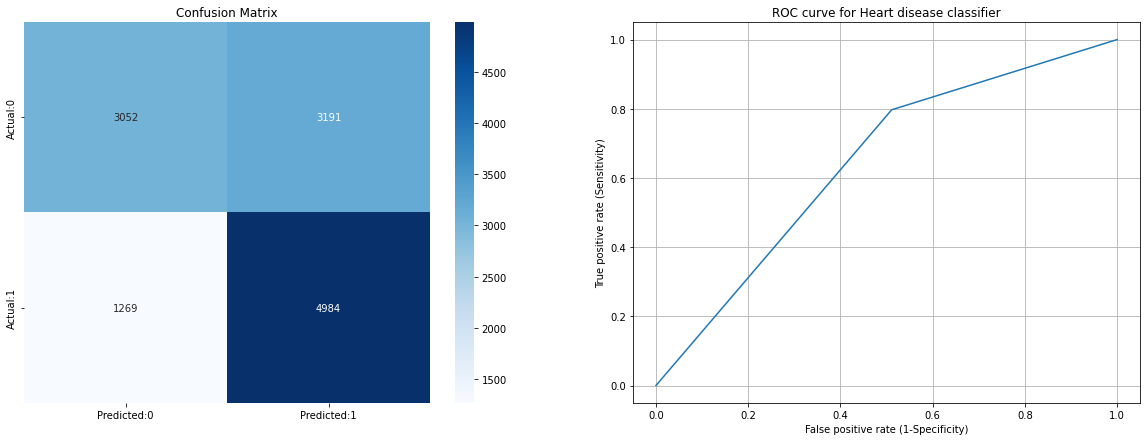

In [22]:
clf = DecisionTreeClassifier(max_leaf_nodes=2, random_state=0)
y_pred_dt = clf.fit(X_train, y_train).predict(X_test)
model_metrics(y_pred_dt, y_test)

### SVM

Accuracy of the model is = 71.967% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74      6243
         1.0       0.76      0.65      0.70      6253

    accuracy                           0.72     12496
   macro avg       0.72      0.72      0.72     12496
weighted avg       0.72      0.72      0.72     12496



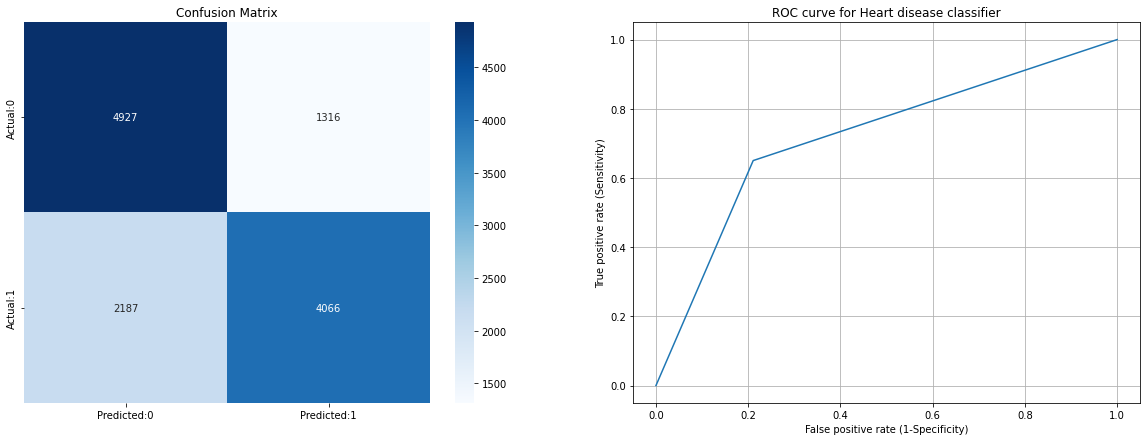

In [24]:
clf = SVC()
y_pred_svm = clf.fit(X_train, y_train).predict(X_test)
model_metrics(y_pred_svm, y_test)

### LDA

Accuracy of the model is = 71.503% 

The details for confusion matrix is =
              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73      6243
         1.0       0.75      0.65      0.69      6253

    accuracy                           0.72     12496
   macro avg       0.72      0.72      0.71     12496
weighted avg       0.72      0.72      0.71     12496



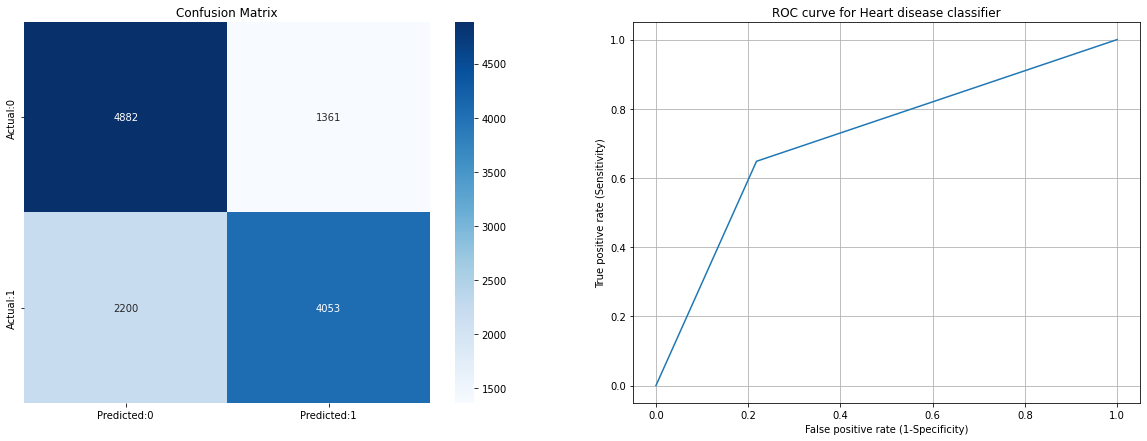

In [29]:
clf = LinearDiscriminantAnalysis()
y_pred_svm = clf.fit(X_train, y_train).predict(X_test)
model_metrics(y_pred_svm, y_test)

In [36]:
def generate_clf(input_gamma, input_C=1):
  classifier = SVC(kernel="poly", gamma=input_gamma, C=input_C)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Accuracy = {}".format(accuracy_score(y_pred, y_test)))
  return classifier

In [37]:
classifier_1 = generate_clf(0.001)

Training Accuracy = 0.4995998719590269


In [39]:
classifier_2 = generate_clf(0.1, 1)

Training Accuracy = 0.6091549295774648


In [40]:
classifier_3 = generate_clf(0.1, 10)

Training Accuracy = 0.6848591549295775


In [41]:
classifier_4 = generate_clf(1, 10)

Training Accuracy = 0.6945422535211268


In [43]:
classifier_7 = generate_clf(1, 50)

Training Accuracy = 0.6943021766965429
